<a href="https://colab.research.google.com/github/livjab/DS-Unit-2-Sprint-2-Regression/blob/master/Model_Diagnostics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv")
pd.set_option('display.max_columns', None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:

df = df.fillna(value=0)

In [0]:
target = "SalePrice"
numeric_columns = df.select_dtypes(include='number').columns

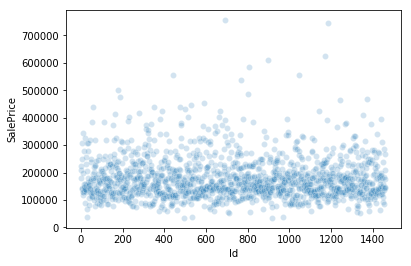

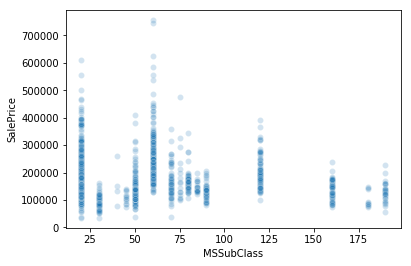

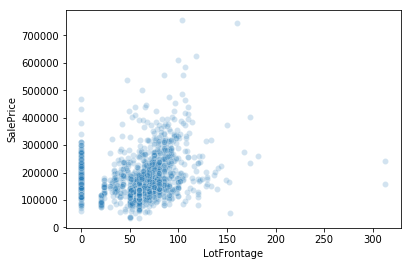

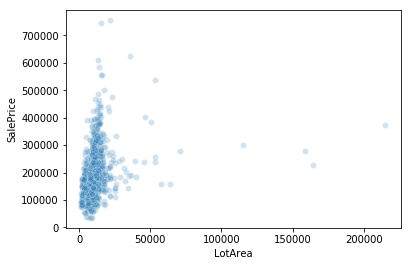

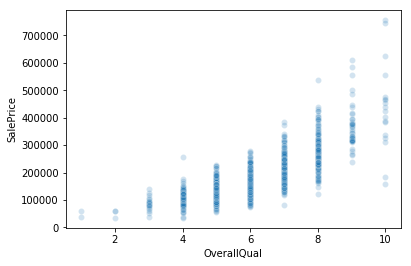

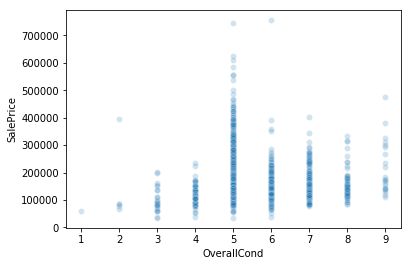

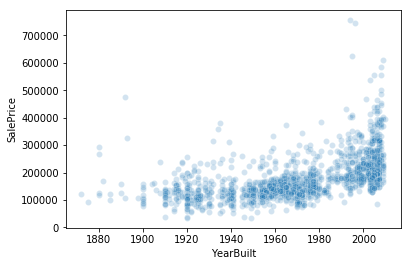

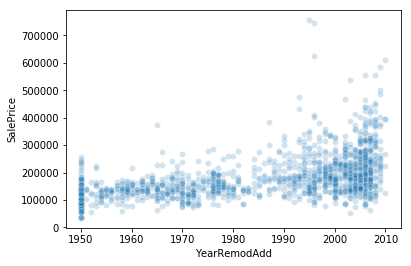

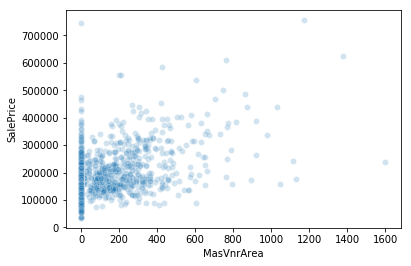

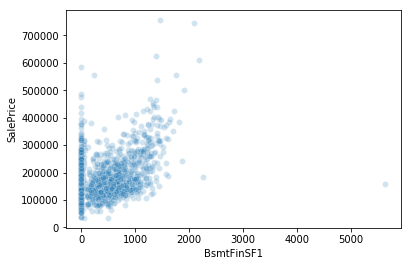

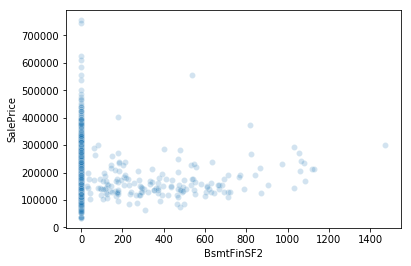

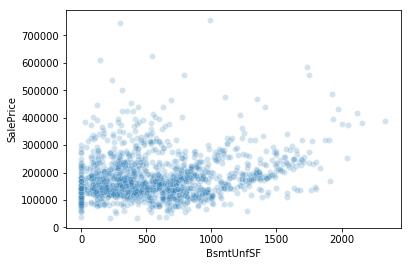

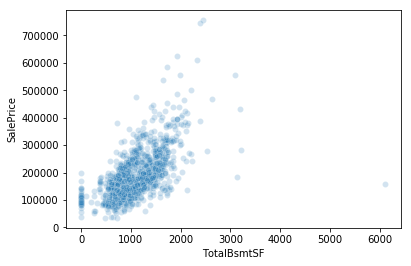

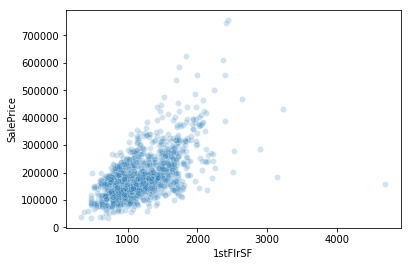

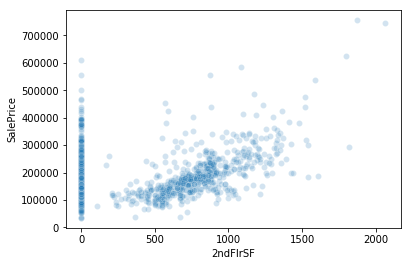

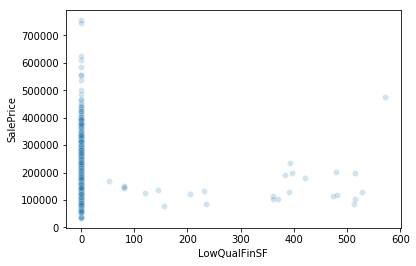

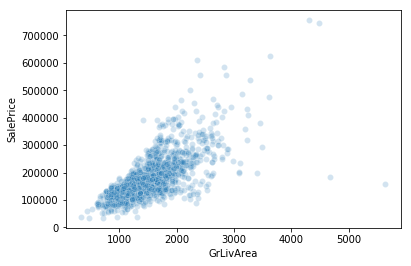

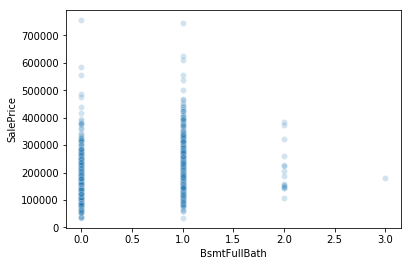

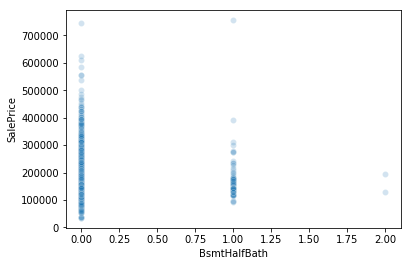

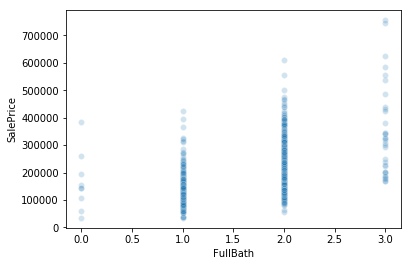

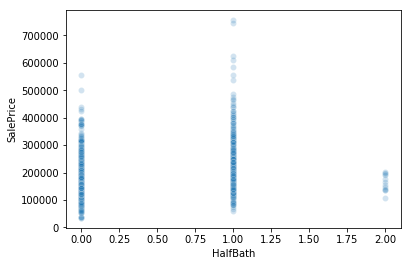

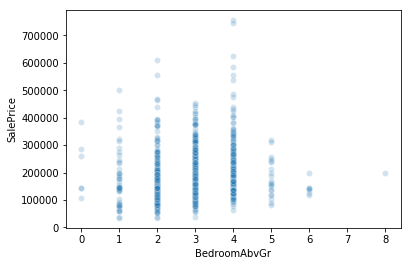

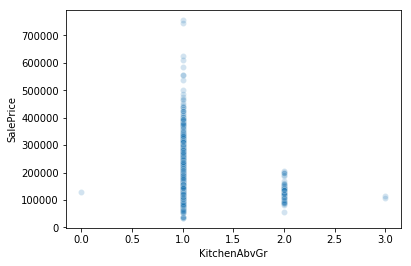

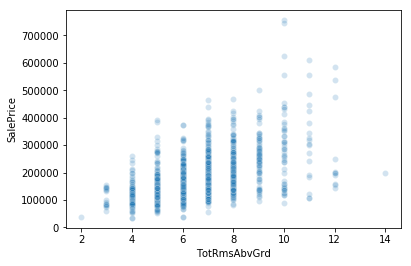

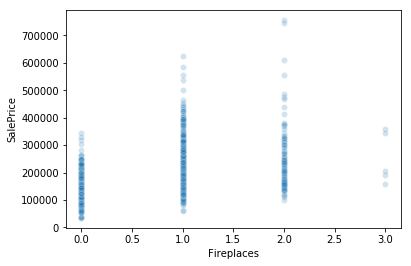

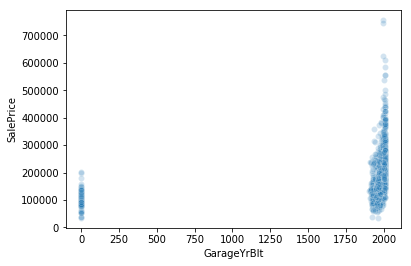

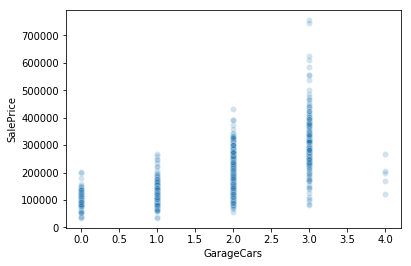

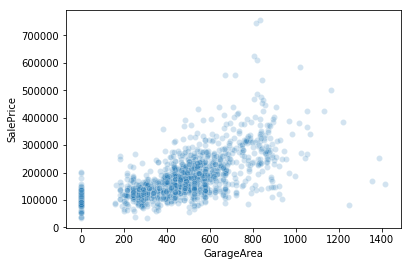

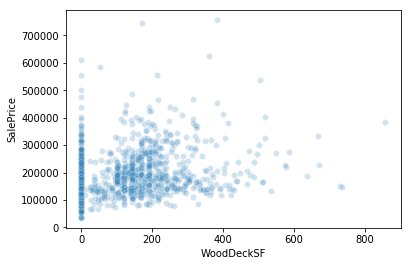

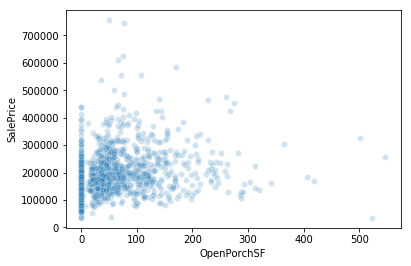

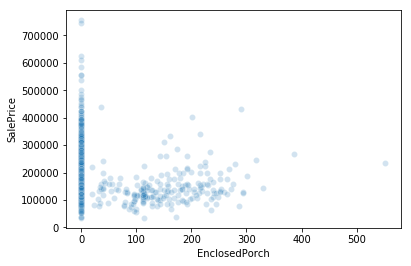

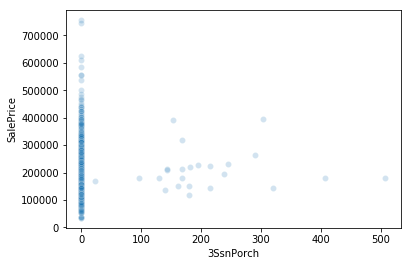

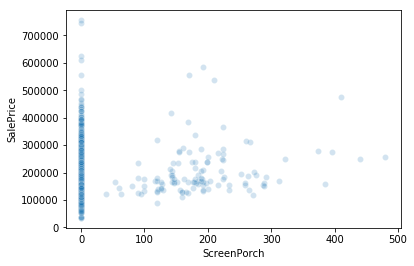

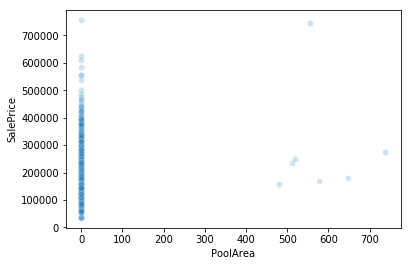

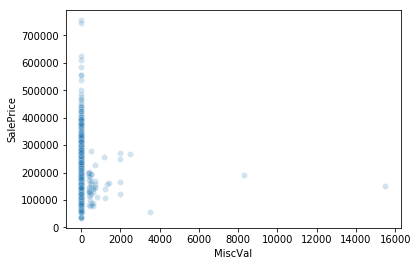

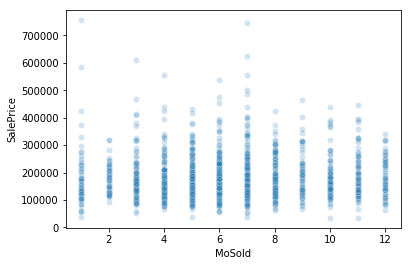

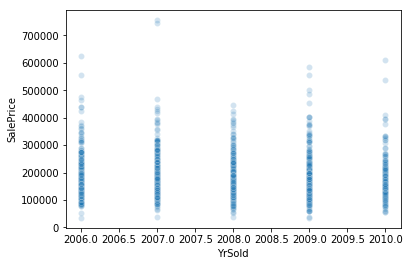

In [5]:
for feature in numeric_columns.drop(target):
    sns.scatterplot(x=feature, y=target, data=df, alpha=0.2)
    plt.show()

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

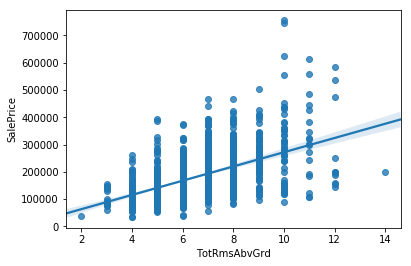

In [6]:
sns.regplot("TotRmsAbvGrd", "SalePrice", data=df);

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [0]:
##### Your Code Here #####

target = "SalePrice"
features = ["OverallQual", "YearBuilt", "1stFlrSF", "GrLivArea", "FullBath",
            "TotRmsAbvGrd", "GarageCars"]

X = df[features]
y = df[target]

In [8]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     681.6
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:32:06   Log-Likelihood:                -17482.
No. Observations:                1460   AIC:                         3.498e+04
Df Residuals:                    1452   BIC:                         3.502e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -8.32e+05   9.07e+04     -9.168   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

    std err, P>|t|

const:
 - 9.07e+04
 - 0.000  --> Reject the null hypothesis. This feature is a meaningful addtion to the model.

OverallQual:
- 1144.021
- 0.000 --> Reject the null hypothesis. This feature is a meaningful addtion to the model.

YearBuilt:
- 47.583
- 0.000 --> Reject the null hypothesis. This feature is a meaningful addtion to the model.

1stFlrSF:
- 3.305
- 0.000 --> Reject the null hypothesis. This feature is a meaningful addtion to the model. 

GrLivArea:
- 4.267
- 0.000 --> Reject the null hypothesis. This feature is a meaningful addtion to the model.

FullBath:
- 2675.734
- 0.008 --> Reject the null hypothesis. This feature is a meaningful addtion to the model.

TotRmsAbvGrd:
- 1128.778
- 0.602  --> Fail to reject the null hypothesis. This feature is not a meaningful addtion to the model.

GarageCars:
- 1843.928
- 0.000 --> Reject the null hypothesis. This feature is a meaningful addtion to the model.

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [0]:
print(df.shape)
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
print(df.shape)

In [0]:
# I'm assuming my df is not clean enough for the aboe code to work, so I'll stick
# with the columns I've already been using.

In [0]:
cleaned_df = df[["OverallQual", "YearBuilt", "1stFlrSF", "GrLivArea", "FullBath",
            "TotRmsAbvGrd", "GarageCars", "SalePrice"]]

In [12]:
print(cleaned_df.shape)
cleaned_df = cleaned_df[(np.abs(stats.zscore(cleaned_df)) < 3).all(axis=1)]
print(cleaned_df.shape)


(1460, 8)
(1411, 8)


In [0]:
features = ["OverallQual", "YearBuilt", "1stFlrSF", "GrLivArea", "FullBath",
            "TotRmsAbvGrd", "GarageCars"]
target = 'SalePrice'

In [14]:
X = cleaned_df[features]
y = cleaned_df[target]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     859.8
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:32:30   Log-Likelihood:                -16496.
No. Observations:                1411   AIC:                         3.301e+04
Df Residuals:                    1403   BIC:                         3.305e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -9.04e+05   7.21e+04    -12.536   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The coefficient for TotRmsAbvGrd changed the most between the two tests. This was the feature with the highest p value in the first run, and once the outliers have been removed, it is now made more relevent to the model.

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [0]:
cleaned_df['ln_price'] = np.log(cleaned_df["SalePrice"])
cleaned_df = cleaned_df.drop(columns="SalePrice")

target = 'ln_price'
features = cleaned_df.columns.drop(target)

In [21]:
X = df[features] 
y = df[target]
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     886.5
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        21:52:23   Log-Likelihood:                 482.47
No. Observations:                1460   AIC:                            -948.9
Df Residuals:                    1452   BIC:                            -906.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.5328      0.411     13.451   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const           8125.309523
OverallQual        2.468355
YearBuilt          2.036602
1stFlrSF           1.610146
GrLivArea          4.957752
FullBath           2.142662
TotRmsAbvGrd       3.319182
GarageCars         1.872374
dtype: float64

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

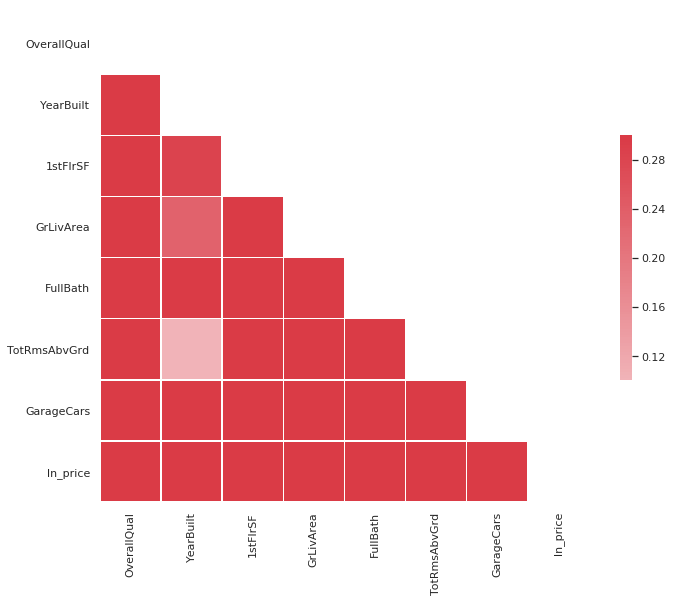

In [24]:
sns.set(style="white")

corr = cleaned_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## 2.3 If you have variables with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [15]:
# going to try removing "GrLivArea" as it had the highest VIF

features = ["OverallQual", "YearBuilt", "1stFlrSF", "FullBath",
            "TotRmsAbvGrd", "GarageCars"]
target = 'SalePrice'

X = cleaned_df[features]
y = cleaned_df[target]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     806.2
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:16:45   Log-Likelihood:                -16619.
No. Observations:                1411   AIC:                         3.325e+04
Df Residuals:                    1404   BIC:                         3.329e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.262e+05   7.77e+04     -9.342   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [0]:
cleaned_df['ln_price'] = np.log(cleaned_df["SalePrice"])
cleaned_df = cleaned_df.drop(columns="SalePrice")

target = 'ln_price'
features = cleaned_df.columns.drop(target)

In [17]:
X = cleaned_df[features]
y = cleaned_df['ln_price']

model = sm.OLS(y, X)
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.197e+06
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:25:49   Log-Likelihood:                 523.01
No. Observations:                1411   AIC:                            -1032.
Df Residuals:                    1404   BIC:                            -995.2
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual      0.0774      0.005     14.695   

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

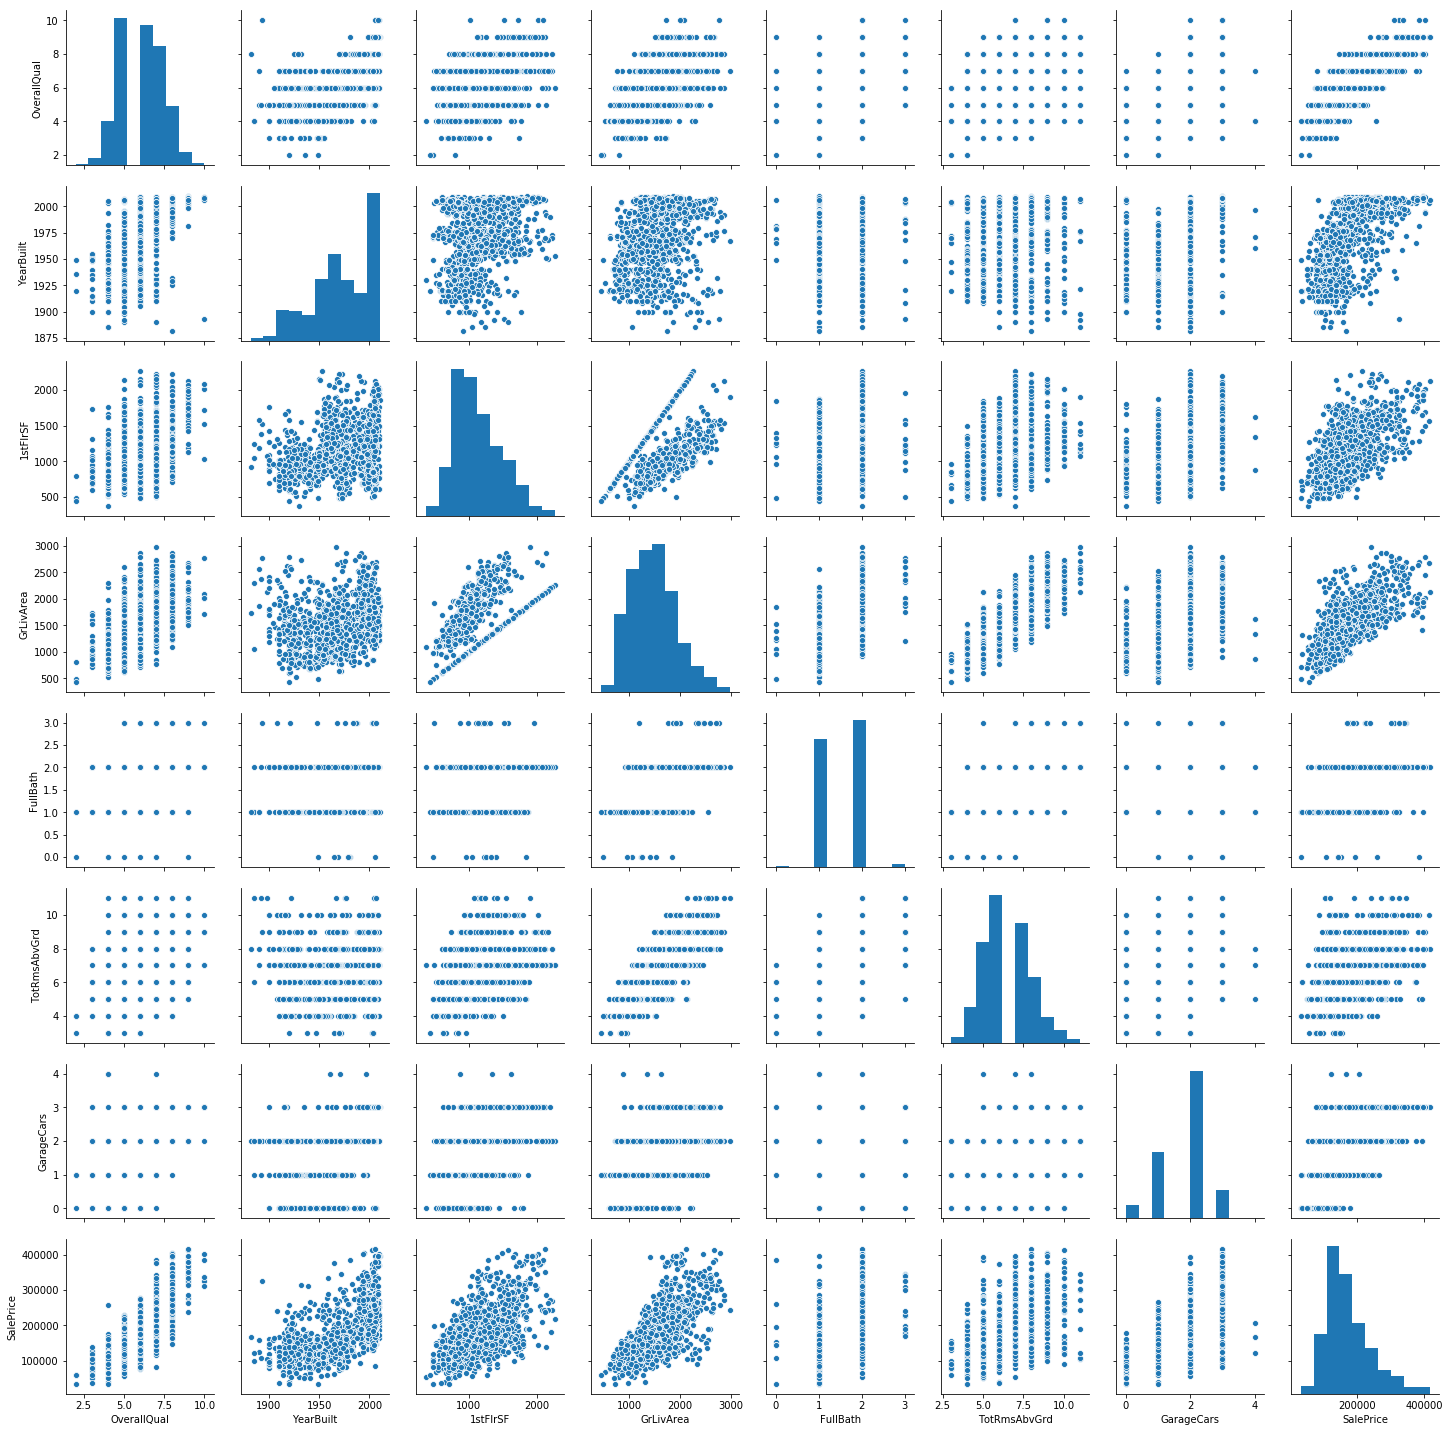

In [15]:
sns.pairplot(cleaned_df)

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

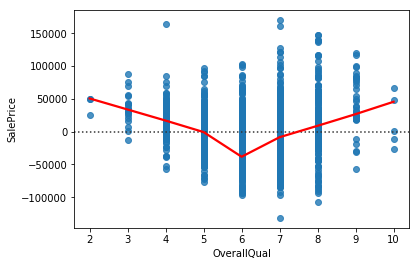

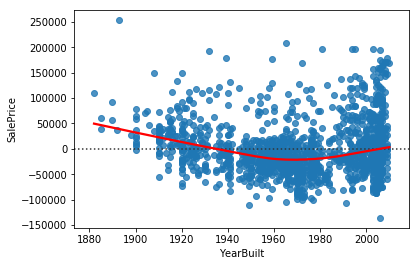

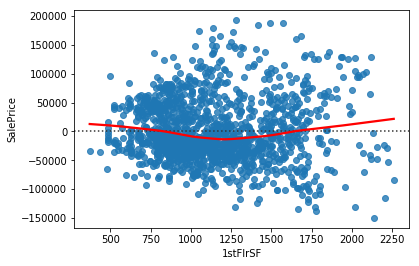

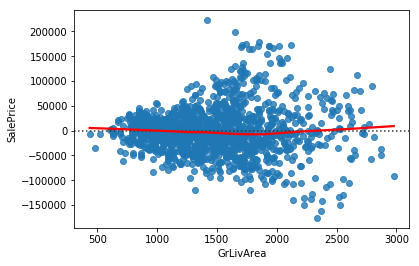

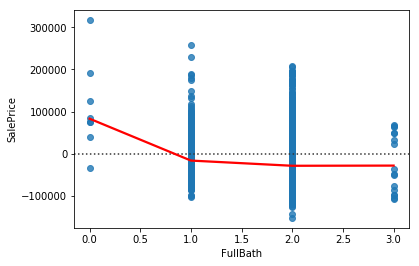

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


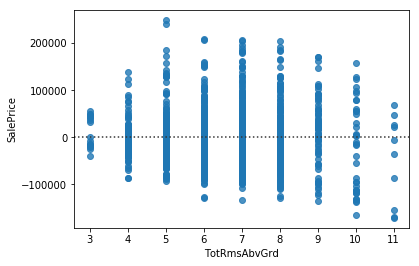

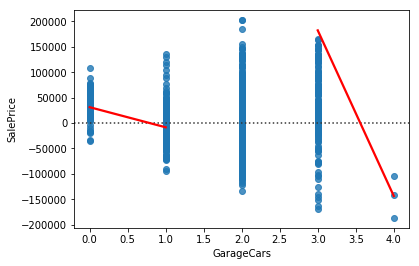

In [16]:
for feature in features:
    sns.residplot(X[feature], y, lowess=True, line_kws=dict(color='r'))
    plt.show()

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [0]:
cleaned_df["1stFlrSF_sq"] = cleaned_df['1stFlrSF']**2
cleaned_df["YearBuilt_sq"] = cleaned_df["YearBuilt"]**2

In [19]:
features = ["OverallQual", "YearBuilt", "YearBuilt_sq", "1stFlrSF", "1stFlrSF_sq", "FullBath",
            "TotRmsAbvGrd", "GarageCars"]
target = 'SalePrice'

X = cleaned_df[features]
y = cleaned_df[target]

model = sm.OLS(y, X)
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     6179.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        23:19:39   Log-Likelihood:                -16616.
No. Observations:                1411   AIC:                         3.325e+04
Df Residuals:                    1403   BIC:                         3.329e+04
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual   2.382e+04   1060.464     22.465   

# Stretch Goals

- Research the assumptions that are required for OLS to be BLUE the "Best Linear Unbiased Estimator". You might try searching and trying to understand the conditions of what's called the Gauss-Markov Theorem.
- Research other diagnostic tests. Can you show that residuals are normally distributed graphically?
- Write a blog post about inferential modeling using linear regression.